In [1]:
from scipy import io
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb

from multi_spectralmixture import MultiSpectralMixture as MOSM
import tensorflow as tf
import random
import time
np.random.seed(10)
tf.set_random_seed(10)
tic0 = time.time()

In [2]:
mat_file1 = io.loadmat('2014_Dataset1.mat')
t = mat_file1['t']
p1 = mat_file1['p1']
p2 = mat_file1['p2']
x = np.arange(0,len(p2)/10,0.1)[:,None]

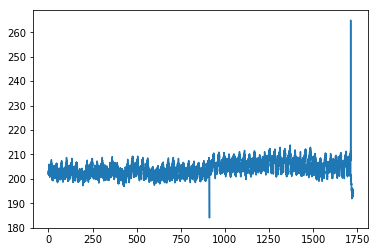

In [3]:
plt.plot(x, p2)
plt.show()

In [4]:
r1 = range(0, 3000)
r2 = range(0, 3000)

X_augmented_train = np.vstack((np.hstack((np.zeros_like(x[r1]),x[r1])), np.hstack((np.ones_like(x[r2]),x[r2]))))
Y_augmented_train = np.vstack([p1[r1], p2[r2]])

In [5]:
INPUT_DIM = 1
N_OUTPUTS = 2

number_of_components = 2
kern = MOSM(INPUT_DIM, N_OUTPUTS)
for i in range(number_of_components-1):
        kern += MOSM(INPUT_DIM, N_OUTPUTS)

#instantiate model
model = gpflow.models.GPR(X_augmented_train, Y_augmented_train, kern)
# model.likelihood.variance = 1
# model.kern.mean=[[5, 200]]

In [6]:
tic1 = time.time()
gpflow.train.ScipyOptimizer().minimize(model, disp=True, maxiter=5000)
toc1 = time.time()
print('Train_time : ', toc1 - tic1)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 5541.624461
  Number of iterations: 1227
  Number of functions evaluations: 1497
Train_time :  6804.571242809296


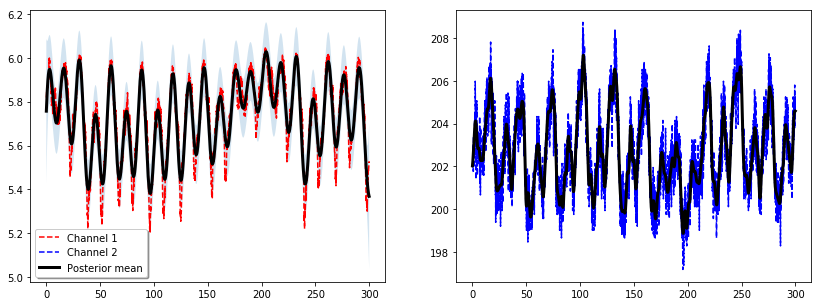

In [7]:
Y_pred, Var_pred = model.predict_f(X_augmented_train)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
ch1, = axes[0].plot(x[r1], p1[r1], 'r--', label='Channel 1')
pred, = axes[0].plot(x[r1], Y_pred[:len(r1)], 'k-', lw=3, label='Posterior mean')
axes[0].fill_between(x[r1].reshape([-1]), (Y_pred[:len(r1)]-2*np.sqrt(Var_pred[:len(r1)])).reshape([-1]), 
                     (Y_pred[:len(r1)]+2*np.sqrt(Var_pred[:len(r1)])).reshape([-1]), alpha=0.2) 

ch2, = axes[1].plot(x[r2], p2[r2], 'b--', label='Channel 2')
axes[1].plot(x[r2], Y_pred[len(r1):], 'k-', lw=3)
axes[1].fill_between(x[r2].reshape([-1]), (Y_pred[len(r1):]-2*np.sqrt(Var_pred[len(r1):])).reshape([-1]), 
                     (Y_pred[len(r1):]+2*np.sqrt(Var_pred[len(r1):])).reshape([-1]), alpha=0.2) 

axes[0].legend(handles=[ch1, ch2, pred], loc=3,shadow=True, fancybox=True,prop={'size':10})

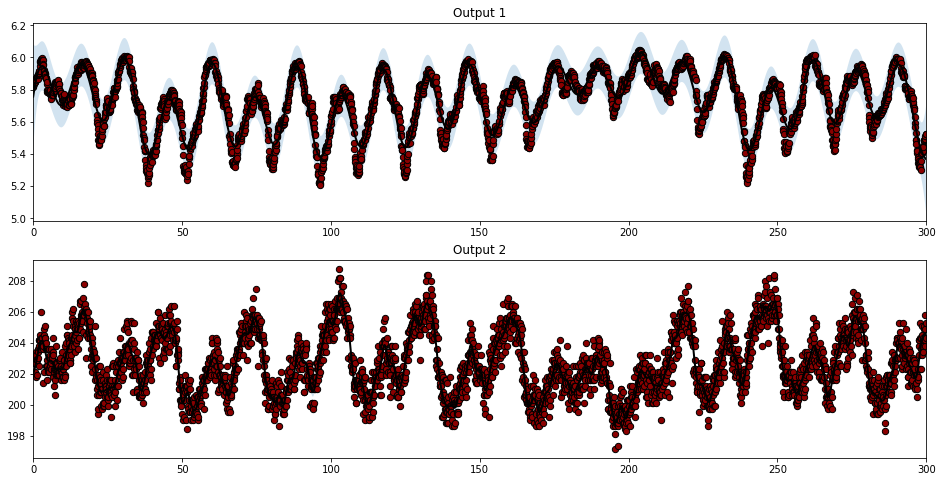

In [8]:
Y_pred, Var_pred = model.predict_f(X_augmented_train)
p1_mean, p2_mean = Y_pred[:len(r1)], Y_pred[len(r1):]
p1_std, p2_std = np.sqrt(Var_pred[:len(r1)]), np.sqrt(Var_pred[len(r1):])  

fig = pb.figure(figsize=(16,8))
#Output 1
ax1 = fig.add_subplot(211)
ax1.set_xlim([r1[0]/10, r1[-1]/10])
ax1.set_title('Output 1')
ax1.scatter(x[r1], p1[r1], s = 40,color='darkred', zorder=2,edgecolors='black')
ax1.plot(x[r1], p1_mean, 'k-', lw=2, label='Posterior mean')
ax1.fill_between(x[r1].reshape([-1]), (p1_mean-1.96*p1_std).reshape([-1]), (p1_mean+1.96*p1_std).reshape([-1]), alpha=0.2) 

#Output 2
ax2 = fig.add_subplot(212)
ax2.set_xlim([r2[0]/10, r2[-1]/10])
ax2.set_title('Output 2')
ax2.scatter(x[r2], p2[r2], s = 40,color='darkred', zorder=2,edgecolors='black')
ax2.plot(x[r2], p2_mean, 'k-', lw=2, label='Posterior mean')
ax2.fill_between(x[r2].reshape([-1]), (p2_mean-1.96*p2_std).reshape([-1]), (p2_mean+1.96*p2_std).reshape([-1]), alpha=0.2) 

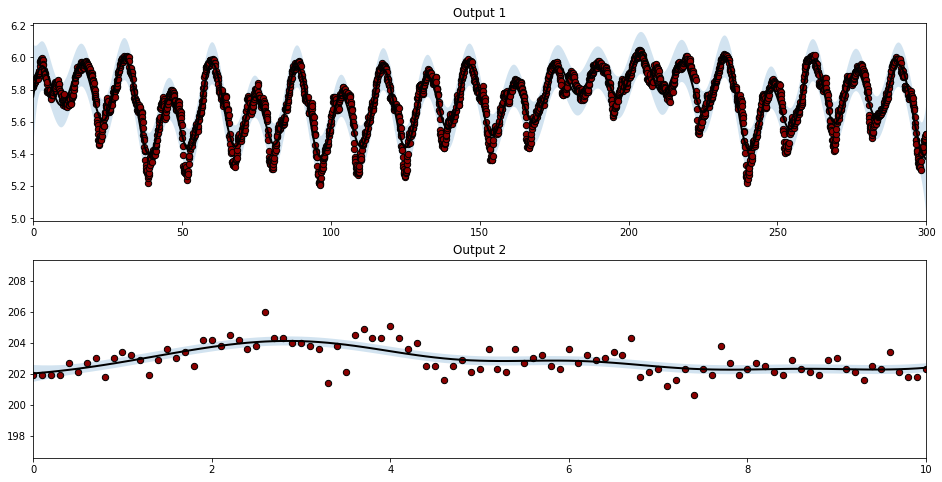

In [9]:
Y_pred, Var_pred = model.predict_f(X_augmented_train)
p1_mean, p2_mean = Y_pred[:len(r1)], Y_pred[len(r1):]
p1_std, p2_std = np.sqrt(Var_pred[:len(r1)]), np.sqrt(Var_pred[len(r1):])  

fig = pb.figure(figsize=(16,8))
#Output 1
ax1 = fig.add_subplot(211)
ax1.set_xlim([r1[0]/10, r1[-1]/10])
ax1.set_title('Output 1')
ax1.scatter(x[r1], p1[r1], s = 40,color='darkred', zorder=2,edgecolors='black')
ax1.plot(x[r1], p1_mean, 'k-', lw=2, label='Posterior mean')
ax1.fill_between(x[r1].reshape([-1]), (p1_mean-1.96*p1_std).reshape([-1]), (p1_mean+1.96*p1_std).reshape([-1]), alpha=0.2) 

#Output 2
ax2 = fig.add_subplot(212)
ax2.set_xlim([r2[0]/10, r2[0]+10])
ax2.set_title('Output 2')
ax2.scatter(x[r2], p2[r2], s = 40,color='darkred', zorder=2,edgecolors='black')
ax2.plot(x[r2], p2_mean, 'k-', lw=2, label='Posterior mean')
ax2.fill_between(x[r2].reshape([-1]), (p2_mean-1.96*p2_std).reshape([-1]), (p2_mean+1.96*p2_std).reshape([-1]), alpha=0.2) 

In [10]:
print(model)

<Parameter name:GPR/likelihood/variance [trainable] transform:+ve shape:() prior:None>
value: 0.3042064

<Parameter name:GPR/kern/multispectralmixture_1/delay [trainable] transform:PartiallyFixed shape:(1, 2) prior:None>
value: [[0.        , 0.42992442]]

<Parameter name:GPR/kern/multispectralmixture_1/constant [trainable] transform:(none) shape:(2,) prior:None>
value: [2.33569351e-03, 5.86702272e+02]

<Parameter name:GPR/kern/multispectralmixture_1/phase [trainable] transform:PartiallyFixed shape:(2,) prior:None>
value: [0.        , 0.10137341]

<Parameter name:GPR/kern/multispectralmixture_1/mean [trainable] transform:(none) shape:(1, 2) prior:None>
value: [[-4.59661987e+01, -2.23000477e-07]]

<Parameter name:GPR/kern/multispectralmixture_1/variance [trainable] transform:+ve shape:(1, 2) prior:None>
value: [[1.00000397e-06, 1.32167172e-05]]

<Parameter name:GPR/kern/multispectralmixture_2/delay [trainable] transform:PartiallyFixed shape:(1, 2) prior:None>
value: [[  0.       , -10.49